In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)

In [27]:
data = pd.read_csv("HR_Analytics.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Box plot

Biểu đồ box plot thể hiện sự phân bố cuả dữ liệu. Thể hiện qua 5 vị trí đó là: giá trị nhỏ nhất (min), tứ phân vị thứ nhất (Q1), trung vị (median), tứ phân vị thứ 3 (Q3) và giá trị lớn nhất (max).

**Biểu đồ lương hằng tháng theo giới tính**

Trường dữ liệu: `Gender`, `MonthlyRate`

Ý nghĩa: có thể so sánh mức lương theo tháng giữa nam và nữ.

Lý do chọn biểu đồ: Với biểu đồ box plot ta có thể thấy được lương hằng tháng của nhân viên phân bố thế nào, kết hợp với trường dữ liệu `Gender` từ đó so sánh mức lương hằng tháng giữa nam và nữ.

In [ ]:
male = data[data['Gender'] == 'Male']['MonthlyRate']
female = data[data['Gender'] == 'Female']['MonthlyRate']

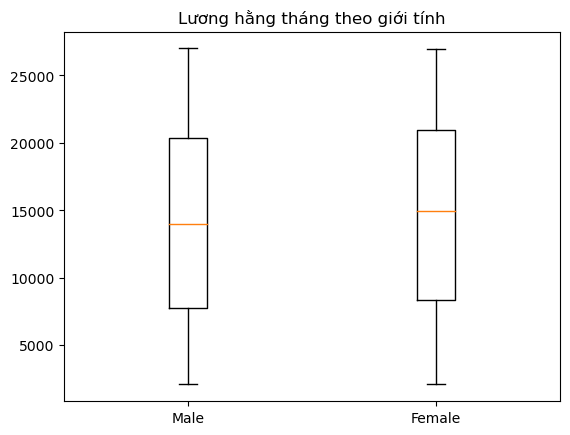

In [31]:
plt.title("Lương hằng tháng theo giới tính")
plt.boxplot([male.values,female.values],labels=['Male','Female']) 
plt.show()

Nhận xét: Phân bố mức lương theo tháng giữa nam và nữ tương đối giống nhau. Điều này chứng tỏ nam nữ đều bình đẳng như nhau, không có sự phân biệt đối với mức lương hàng tháng đối với nam và nữ

### Heat map

Biểu đồ heat map là một biểu đồ hai chiều được sử dụng để trình bày dữ liệu trong đó màu sắc của mỗi ô được sử dụng để đại diện cho giá trị của dữ liệu đó. Chúng có thể giúp cho người dùng nhìn thấy các mối quan hệ và xu hướng trong dữ liệu một cách nhanh chóng và dễ dàng hơn so với việc sử dụng các biểu đồ khác.

**Biểu đồ sự hài lòng với công việc và sự hài lòng với môi trường làm việc của nhân viên:**

Trường dữ liệu: `JobSatisfaction`, `EnvironmentSatisfaction`

Ý nghĩa: Vừa cho thấy được sự hài lòng của nhân viên với công việc, vừa cho thấy được sự hài lòng của nhân viên với môi trường làm việc trên cùng biểu đồ. Cảm nhận của nhân viên với môi trường làm việc và công việc của mình làm.

Lý do chọn biểu đồ: 
- Mỗi trường dữ liệu đều có ít giá trị, nên sự lặp lại của các cặp giá trị là nhiều.
- Để thể hiện sự hài lòng với công việc và sự hài lòng với môi trường làm việc trên cùng 1 biểu đồ, ta sẽ đếm từng cặp dữ liệu giữa 2 trường, qua đó biết được dữ liệu thường xuất hiện ở những cặp giá trị nào. Khi đó ta sẽ có 1 ma trận giá trị, lúc này dùng đến heatmap

In [36]:
x = data.groupby('JobSatisfaction')['EnvironmentSatisfaction'].value_counts().sort_index()
x

JobSatisfaction  EnvironmentSatisfaction
1                1                           53
                 2                           55
                 3                           94
                 4                           87
2                1                           47
                 2                           59
                 3                           87
                 4                           87
3                1                          100
                 2                           84
                 3                          128
                 4                          130
4                1                           84
                 2                           89
                 3                          144
                 4                          142
Name: EnvironmentSatisfaction, dtype: int64

In [15]:
y = np.array(x).reshape(4,4)
y

array([[ 53,  55,  94,  87],
       [ 47,  59,  87,  87],
       [100,  84, 128, 130],
       [ 84,  89, 144, 142]])

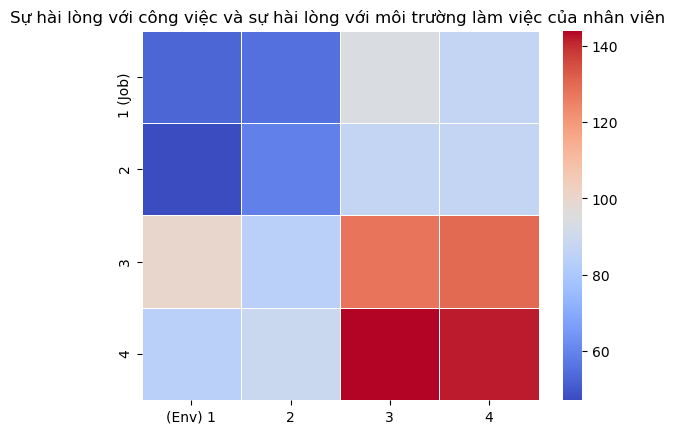

In [37]:
xlabel = ['(Env) 1',2,3,4]
ylabel = ['1 (Job)',2,3,4]

ax = sns.heatmap( y , linewidth = 0.5 , cmap = 'coolwarm', xticklabels=xlabel, yticklabels=ylabel )
  
plt.title( "Sự hài lòng với công việc và sự hài lòng với môi trường làm việc của nhân viên " )
plt.show()

Nhận xét: 
- Đa số các nhân viên đều vừa hài lòng với công việc của mình, vừa hài lòng với công việc của mình. Trong đó có vẻ như nhiều người hài lòng với môi trường hơn với công việc.
- Số người vừa không hài lòng với công việc, vừa không hài lòng với mối trường làm việc chiếm tỷ lệ ít nhất.
- Số người chỉ hài lòng với công việc mà không hài lòng với môi trường hay ngược lại cũng có không ít.

### Bar chart

...

**Biểu đồ tỉ lệ tăng lương theo hiệu suất nhân viên**

Trường dữ liệu: `PerformanceRating`, `PercentSalaryHike`

Ý nghĩa: Thể hiện tỉ lệ tăng lương theo hiệu suất nhân viên, qua đó so sánh tỉ lệ tăng lương giữa các hiệu suất làm việc.

Lý do chọn biểu đồ: Biểu đồ cột dễ so sánh, với mỗi cột sẽ thể hiện tỉ lệ tăng lương của một giá trị hiệu suất làm việc.

Do mối người đều có tỉ lệ tăng lương khác nhau nên chúng ta sẽ tính tỉ lệ tăng lương trung bình với mỗi hiệu suất làm viêc.

In [22]:
x = data.groupby('PerformanceRating')['PercentSalaryHike'].mean()
x

PerformanceRating
3    14.003215
4    21.849558
Name: PercentSalaryHike, dtype: float64

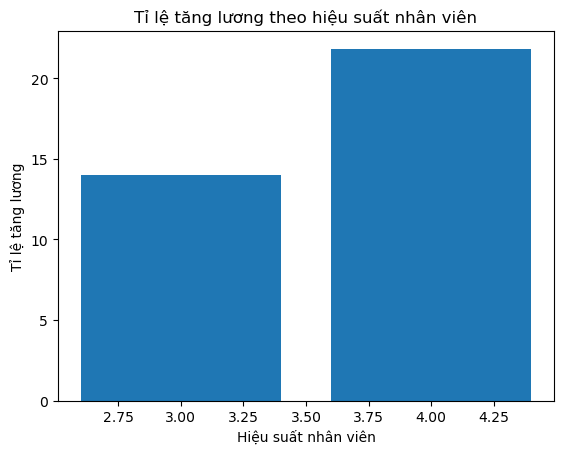

In [23]:
# creating the bar plot
plt.bar(x.index, x.values)
 
plt.xlabel("Hiệu suất nhân viên")
plt.ylabel("Tỉ lệ tăng lương")
plt.title("Tỉ lệ tăng lương theo hiệu suất nhân viên")
plt.show()

Nhận xét:
- Hiệu suất làm việc cao hơn thì tỉ lệ tăng lương cao hơn rất nhiều.